(10454, 62)


/var/folders/jb/2grr3hjx7fng_kz01_rqpskm0000gn/T/ipykernel_38715/2324046745.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mi.drop(columns = 'state', inplace = True)


<Figure size 432x288 with 0 Axes>

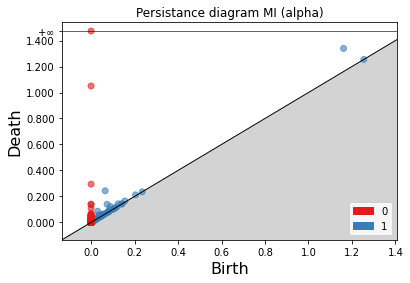

<Figure size 432x288 with 0 Axes>

In [6]:
import pandas as pd
import gudhi as gd
import matplotlib.pyplot as plt
import gudhi.representations
import numpy as np

def alpha_pd(lat_long, state):
    stree = gd.AlphaComplex(points=lat_long).create_simplex_tree()
    dgm = stree.persistence(persistence_dim_max=True)
    plt.figure()
    gd.plot_persistence_diagram(dgm, legend=True)
    plt.title('Persistance diagram ' + state + ' (alpha)')
    plt.savefig('../output/pd_whole/' + state + 'alpha_pd.jpeg', bbox_inches='tight')
    return stree

def rips_pd(lat_long, state):
    stree = gd.AlphaComplex(points=lat_long).create_simplex_tree()
    dgm = stree.persistence(persistence_dim_max=True)
    plt.figure()
    gd.plot_persistence_diagram(dgm, legend=True)
    plt.title('Persistance diagram ' + state + ' (alpha)')
    plt.savefig('../output/pd_whole/' + state + 'rips_pd.jpeg', bbox_inches='tight')
    plt.close()
    return stree

def rips_landscapes(lat_long, state, rips):
    dgms = []
    DS = gd.representations.DiagramSelector(use=True, limit=np.inf, point_type='finite')
    dim0int_without_infinity = DS.fit_transform([rips.persistence_intervals_in_dimension(0)] )
    #print(dim0int_without_infinity)

    #next, we look at 1-dimensional persistence intervals, however, 
    # all 1-d intervals (blue) persist to infinity and will be removed to create the persistence landscapes
    #dgms=[ac.persistence_intervals_in_dimension(1)]
    #print(dgms2)
    #dim1int_without_infinity = DS.fit_transform([rips.persistence_intervals_in_dimension(1)])
    #print(dim1int_without_infinity)
    LS=gd.representations.Landscape(num_landscapes=10, resolution=100)
    L=LS.fit_transform(dim0int_without_infinity)
    #plots the landscape, adds title and legend
    land1 = plt.figure()
    plt.plot(L[0][:100], label = "Landscape 1" )
    plt.plot(L[0][100:200], label = "Landscape 2")
    plt.plot(L[0][200:300], label = "Landscape 3")
    plt.plot(L[0][300:400], label = "Landscape 4")
    plt.plot(L[0][400:500], label = "Landscape 5")
    plt.plot(L[0][500:600], label = "Landscape 6")
    plt.plot(L[0][600:700], label = "Landscape 7")
    plt.plot(L[0][700:800], label = "Landscape 8")
    plt.plot(L[0][800:900], label = "Landscape 9")
    plt.plot(L[0][900:1000], label = "Landscape 10")
    plt.legend()
    plt.title('Landscapes (pc0, dimension 0)')


def main():
    df = pd.read_csv('../raw/mpv-data.csv')
    print(df.shape)
    df = df[['latitude', 'longitude', 'state']]
    state = df.state.unique().tolist()

    mi = df[df['state']=='MI']
    mi.drop(columns = 'state', inplace = True)
    atree = alpha_pd(mi.values.tolist(), 'MI')
    rtree = rips_pd(mi.values.tolist(), 'MI')

if __name__=='__main__':
    main()